# Исследование надежности заемщиков.

# Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

# Описание данных
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

## Шаг 1. Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data_original = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
data = data_original.copy()

In [3]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
data.duplicated().sum()

54

In [6]:
data.children.value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [7]:
data.dob_years.describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [8]:
data[data.dob_years < 18].dob_years.value_counts()

0    101
Name: dob_years, dtype: int64

In [9]:
data[data.dob_years == 0].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,-2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,-1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,-1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль


In [10]:
data.education.unique(), data.family_status.unique(), data.gender.unique(), data.income_type.unique(), data.purpose.unique()

(array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
        'неоконченное высшее', 'начальное', 'Высшее',
        'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
        'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
       dtype=object),
 array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
        'в разводе', 'Не женат / не замужем'], dtype=object),
 array(['F', 'M', 'XNA'], dtype=object),
 array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
        'безработный', 'предприниматель', 'студент', 'в декрете'],
       dtype=object),
 array(['покупка жилья', 'приобретение автомобиля',
        'дополнительное образование', 'сыграть свадьбу',
        'операции с жильем', 'образование', 'на проведение свадьбы',
        'покупка жилья для семьи', 'покупка недвижимости',
        'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
        'строительство собственной недвижимости', 'недвижимость',
        'строительство 

In [11]:
data.days_employed.describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [12]:
data.income_type.value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

В данных пристуствуют следующие проблемы:
- в столбцах days_employed и total_income есть пропущенные значения;
- в столбцах days_employed и children пристуствуют отрицательные значения, что явлаестя аномалией;
- пристуствуют дубликаты;
- значения с разным регистром в стобцах education и family_status;
- тип данных столбцов days_employed, total_income и dob_years вещественный;
- в days_employed пристуствуют аномально-высокие значения. Для нашей задачи это не критично, так как от этого поля не зависят наши выводы;
- есть некоректные данные в возрасте клиентов: 101 запись в возратом 0, возможно клиент не указала возраст.

Также выделим данные в отдельные датафреймы и проведем категоризацию по доходу и цели полученяи кредита.

## Предобработка данных

### Шаг 2.2 Проверка данных на аномалии и исправления.

In [13]:
data.days_employed.describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

Общий трудовой стаж не может быть отрицательным. Также и с количеством детей.
Причина ошибки возможна как техническая, так и человеческий фактор.
Заменим все значения в этом столбце на значения с модулем.

In [14]:
data.loc[data.days_employed < 0, 'days_employed'] = abs(data[data.days_employed < 0]['days_employed'])

In [15]:
data.loc[data.children == -1, 'children'] = 1

Проверяем.

In [16]:
data.days_employed.min(), data.days_employed.max(), data.days_employed.median(), data.days_employed.mean()

(24.14163324048118, 401755.40047533, 2194.220566878695, 66914.72890682236)

In [17]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Отрицательных значений больше нет.

Заменим знаечние возрата 0 на медианное значение.

In [18]:
data.loc[data.dob_years == 0, 'dob_years'] = data.dob_years.median()

Также в столбце со значением количества детей аномально высокий показатель клиентов с 20-тью детьми. 

In [19]:
data.children.value_counts()

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

In [20]:
data[data.children == 20]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,880.221113,21.0,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
720,20,855.595512,44.0,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости
1074,20,3310.411598,56.0,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования
2510,20,2714.161249,59.0,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью
2941,20,2161.591519,42.0,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля
...,...,...,...,...,...,...,...,...,...,...,...,...
21008,20,1240.257910,40.0,среднее,1,женат / замужем,0,F,сотрудник,1,133524.010303,свой автомобиль
21325,20,601.174883,37.0,среднее,1,женат / замужем,0,F,компаньон,0,102986.065978,профильное образование
21390,20,NaN,53.0,среднее,1,женат / замужем,0,M,компаньон,0,NaN,покупка жилой недвижимости
21404,20,494.788448,52.0,среднее,1,женат / замужем,0,M,компаньон,0,156629.683642,операции со своей недвижимостью


Скорее всего здесь человеческая ошибка. Заменим 20 на 2.

In [21]:
data.loc[data.children == 20, 'children'] = 2

In [22]:
data.children.value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Рассмотрим столбец с указанием пола.

In [23]:
data.gender.value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [24]:
data[data.gender == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24.0,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Имеется 1 клиент, который не указал свой пол. Удалим эту строку.

In [25]:
data = data[data.gender != 'XNA']

In [26]:
data.gender.value_counts()

F    14236
M     7288
Name: gender, dtype: int64

В наших данных остались аномально-высокие и аномально-низкие значения. В рамках этого проекта не будем их заменять, так как от этих данных не зависит наше иследование. О природе этих аномалий стоит проконсультироваться с инженером данных.

Исправими регистр в столбцах education и family_status.

In [27]:
data.education = data.education.str.lower()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
data.education.value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      743
начальное                282
ученая степень             6
Name: education, dtype: int64

In [29]:
data.family_status = data.family_status.str.lower()

In [30]:
data.family_status.value_counts()

женат / замужем          12380
гражданский брак          4176
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

### Шаг 2.1 Заполнение пропусков

Рассмотрим пропущенные значения.

In [31]:
data[data.days_employed.isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65.0,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41.0,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63.0,среднее,1,не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50.0,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54.0,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47.0,среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50.0,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48.0,высшее,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42.0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


In [32]:
data[data.total_income.isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65.0,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41.0,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63.0,среднее,1,не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50.0,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54.0,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47.0,среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50.0,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48.0,высшее,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42.0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


In [33]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропущено 2174 значений в столбцах days_employed и total_income. Значения пропущени в одних записях. Возможна техническая ошибка, следует поговорить с разрабочтиками.

Заменим все пропуски на медианные значения соответствующих столбцов.

In [34]:
for income in data.income_type.unique():
    median_days = data[data.income_type == income]['days_employed'].median()
    median_total_income = data[data.income_type == income]['total_income'].median()
#    print('days_employed:', median_days, ', total_income', median_total_income)
    data.loc[(data.income_type == income) & (data.days_employed.isna()), 'days_employed'] = median_days
    data.loc[(data.income_type == income) & (data.total_income.isna()), 'total_income'] = median_total_income

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [35]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Отлично, пустых значений не осталось.
Медианные значения в нашей ситуации подходят лучше, так как в наших данных большой размах. В случае медианы - половина значений больше, половина меньше.

### Шаг 2.3. Изменение типов данных.

Преобразуем тип данных в стобцах days_employed, total_income и dob_years в int, таким образом будут записаны целые числа.

In [36]:
data.days_employed = data.days_employed.astype('int')
data.total_income = data.total_income.astype('int')
data.dob_years = data.dob_years.astype('int')

In [37]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
children            21524 non-null int64
days_employed       21524 non-null int64
dob_years           21524 non-null int64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null int64
purpose             21524 non-null object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


### Шаг 2.4. Удаление дубликатов.

In [39]:
data.duplicated().sum()

72

Удалим полные дубликаты стандартным методом pandas с заменой индексов.

In [40]:
data = data.drop_duplicates().reset_index(drop=True)

In [41]:
data.duplicated().sum()

0

Дубликатов не осталось

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Выделим в отдельный датафрейм информацию об образовании.

In [42]:
education = data[['education_id', 'education']]

In [43]:
education = education.drop_duplicates().reset_index(drop=True)

In [44]:
education

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


Также сделаем с семейным статусом.

In [45]:
family_status = data[['family_status_id', 'family_status']]

In [46]:
family_status = family_status.drop_duplicates().reset_index(drop=True)

In [47]:
family_status

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


Удалим из таблицы информацию, которую мы вынесли в отдельные датафреймы. Оставим их id, по которым можно будет искать их значение.

In [48]:
data_upd = data.drop(['education', 'family_status'], axis=1)

In [49]:
data_upd

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...
21447,1,4529,43,1,1,F,компаньон,0,224791,операции с жильем
21448,0,343937,67,1,0,F,пенсионер,0,155999,сделка с автомобилем
21449,1,2113,38,1,1,M,сотрудник,1,89672,недвижимость
21450,3,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля


### Шаг 2.6. Категоризация дохода.

Создадим функцию для присваивания категорий в зависимости от дохода.

In [50]:
def get_income_category(total_income):
    if total_income <= 30000: return 'E'
    if total_income <= 50000: return 'D'
    if total_income <= 200000: return 'C'
    if total_income <= 1000000: return 'B'
    return 'A'

In [51]:
data_upd['total_income_category'] = data_upd.total_income.apply(get_income_category)

In [52]:
data_upd.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Шаг 2.7. Категоризация целей кредита.

Также создадим функцию для категоризации целей кредита.

In [53]:
data_upd.purpose.value_counts()

свадьба                                   791
на проведение свадьбы                     767
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      620
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

In [2]:
def get_purpose_category(purpose):
    if 'авто' in purpose: return 'операции с автомобилем'
    if 'недвижимост' in purpose or 'жиль' in purpose: return 'операции с недвижимостью'
    if 'свадьб' in purpose: return 'проведение свадьбы'
    if 'образован' in purpose: return 'получение образования'

In [55]:
data_upd['purpose_category'] = data_upd.purpose.apply(get_purpose_category)

In [56]:
data_upd.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [57]:
data_upd.purpose_category.value_counts()

операции с недвижимостью    10810
операции с автомобилем       4306
получение образования        4013
проведение свадьбы           2323
Name: purpose_category, dtype: int64

### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

Рассмотрим отношение количества клиентов, имеющих задолжности по возврату кредитов, к общему числу клиентов в заивисимости от количества детей.

In [58]:
data_children = (data_upd.groupby('children')['debt'].sum() * 100 / data_upd.groupby('children')['debt'].count()).reset_index()
data_children

,children,debt
0,0,7.544893
1,1,9.165808
2,2,9.492481
3,3,8.181818
4,4,9.756098
5,5,0.000000


У клиентов, имеющих от 0 до 4 детей, доля имеющих задолжность колеблется от 7.5 до 9.7%.
Рассмотрим подробнее клиентов с 5 детьми.

In [59]:
data_upd[data_upd.children == 5][['children','debt']]

,children,debt
3977,5,0
4394,5,0
7859,5,0
15785,5,0
15879,5,0
16171,5,0
20385,5,0
20768,5,0
21085,5,0


Клиентов банка с 5 детьми всего 9 человек и все они не имели задолжности по платежам по кредитам. Но выборка из 9 человек слишком мала для каких-либо выводам по этой группе.

##### Вывод 1:

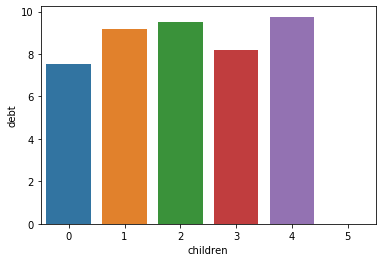

In [60]:
sns.barplot(x = data_children.children, y = data_children.debt)

Зависимость между количеством детей и возвратом кредита в срок прослеживается слабо. 
Доля не имеющих детей клиентов, имевших задолжности по возврату кредита - 7.5%.
Доля клиентов с количеством детей от 1 до 4, имевших задолженность колеблется от 8.2 до 9.7%.
Выделяется группа клиентов с 5 детьми, но таких всего 9. Поэтому такая выборка не является репрезентабельной.

Делаем следующие выводы:
- клиенты без детей и с 3 детьми не значительно реже имеют просрочки по кредитам;
- клиенты с 1, 2, 4 в равной степени оплачивают кредит в срок.

Количество детей не значительно влияет на возврат кредита в срок.

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

Рассмотрим отношение количества клиентов, имеющих задолжности по возврату кредитов, к общему числу клиентов в заивисимости от семейного положения.

In [61]:
data_family = family_status.merge(data_upd.groupby('family_status_id')['debt'].sum() * 100 / data_upd.groupby('family_status_id')['debt'].count(),
                   on='family_status_id')[['family_status', 'debt']].sort_values(by='debt')
data_family

,family_status,debt
2,вдовец / вдова,6.569343
3,в разводе,7.112971
0,женат / замужем,7.545182
1,гражданский брак,9.351651
4,не женат / не замужем,9.750890


#####  Вывод 2:

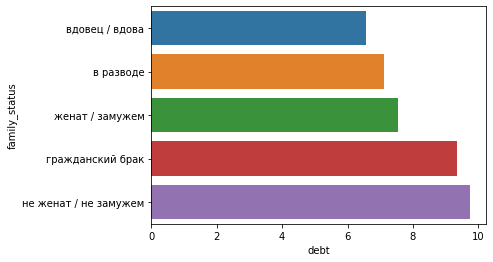

In [62]:
sns.barplot(y = data_family.family_status, x = data_family.debt)

Не женатые/не замужние и состоящие в гражданском браке клиенты в большей степени имеют просрочки.
Клиенты же состоящие в браке/разводе, либо же являющиеся вдовцом/вдовой, более ответсвтенны и реже имеют просрочки по оплате кредита.

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [63]:
data_income = (data_upd.groupby('total_income_category')['debt'].sum() * 100 / data_upd.groupby('total_income_category')['debt'].count()).sort_values().reset_index()
data_income

,total_income_category,debt
0,D,6.000000
1,B,7.062091
2,A,8.000000
3,C,8.492569
4,E,9.090909


#####  Вывод 3:

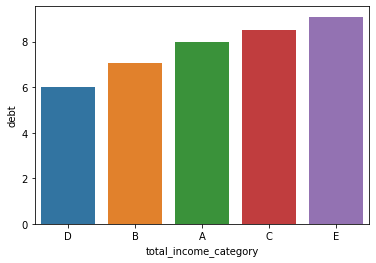

In [64]:
sns.barplot(x=data_income.total_income_category, y=data_income.debt)

Наибольший риск просрочек у групп клиентов зарпалтных категорий "E" (зарплата до 30 000 рублей) и "C" (зарплата 50 001–200 000).


##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

In [65]:
data_purpose = (data_upd.groupby('purpose_category')['debt'].sum() * 100 / data_upd.groupby('purpose_category')['debt'].count()).sort_values().reset_index()
data_purpose

,purpose_category,debt
0,операции с недвижимостью,7.234043
1,проведение свадьбы,8.006888
2,получение образования,9.220035
3,операции с автомобилем,9.359034


#####  Вывод 4:

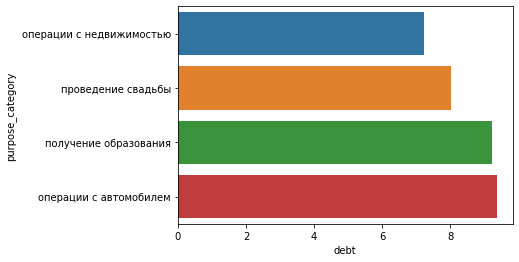

In [66]:
sns.barplot(x=data_purpose.debt, y=data_purpose.purpose_category)

Клиенты, берущие кредит для получения образования и операций с автомобилем, имеют больший процент просрочек.

## Общий вывод:

In [67]:
#общий процент должников возьмем за средний процент просрочки
int(data_upd[data_upd.debt == 1].debt.count() * 100 / data_upd.debt.count())

8

In [68]:
sns.set_style('whitegrid')

In [70]:
# fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
#fig.suptitle('Initial Pokemon - 1st Generation')
sns.barplot(ax=axes[0][0], x = data_children.children, y = data_children.debt)
axes[0][0].set_title('% просрочки по кредитам в зависимости от уровня дохода')
sns.barplot(ax=axes[0][1], x=data_income.total_income_category, y=data_income.debt)
axes[0][1].set_title('% просрочки по кредитам в зависимости от уровня дохода')

family_status_gr = sns.barplot(ax=axes[1][0], x = data_family.family_status, y = data_family.debt)
family_status_gr.set_xticklabels(family_status_gr.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
axes[1][0].set_title('% просрочки по кредитам в зависимости от уровня дохода')

purpose_category_gr = sns.barplot(ax=axes[1][1], y=data_purpose.debt, x=data_purpose.purpose_category)
purpose_category_gr.set_xticklabels(purpose_category_gr.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
axes[1][1].set_title('% просрочки по кредитам в зависимости от цели кредита')


Text(0.5, 1, '% просрочки по кредитам в зависимости от цели кредита')

Общий процент клиентов, имевших просрочку по кредиту, составляет 8%.<br>
При рассмотрении зависимости просрочки платежа от различных категорий клиентов доля задолжностей по кредиту отклоняется незначительно, в пределах 1.5% от средней доли должников.<br>
Наибольший риск просрочек у следующих категорий клиентов:
- клиенты с 1, 2 и 4 детьми;
- клиенты зарпалтных категорий "E" (зарплата до 30 000 рублей) и "C" (зарплата 50 001–200 000);
- не женатые/не замужние и состоящие в гражданском браке клиенты;
- клиенты, берущие кредит для получения образования и операций с автомобилем.